# 0. Workflow:

1. Problem description, data characteristics, visualisation, distributions, etc.

2. Preprocessing:
   - missing data (delete, leave, imputation + explaination);
   - normalization/standarization (type of transformation + description, transformation categorical data);
   - separation - test and training sets (training/test, cross-validation, proportions of subsets);

3. Building and training neural network:
    - layers, neurons quantity; 
    - activation functions (+description, last layer should transform to binary output);
    - optimalisation method (+description, which one returns best results);
    - loss function and metrics (+description);
    - model fitting (epochs number, batch size, model evaluation (training result));
    - test set based classification (evaluation methods of binary classifier, including data type (should include just and only most desriptive metrics

4. Additional methods not presented in labs/lectures.

5. Present different parameters values, to decide, which ones caused accuracy and classification improvement.

In [1]:
import yellowbrick
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy as sp
import keras
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers
from scipy import stats
from sklearn.metrics import confusion_matrix
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import seaborn as sns
from keras import metrics as k_metrics
from sklearn import metrics as s_metrics

C:\Users\Acer\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


# 1. Problem description

...

# 2. Reading data using Pandas

In [2]:
data = pd.read_csv("logreg.txt", sep = ";", dtype={'genotype': np.object})

# 3. Data characteristics

In [3]:
# data.head()
# data.shape
# print(data.dtypes)

# data.BEFORE1.value_counts()
# data.BEFORE2.value_counts()
# data.BEFORE3.value_counts()

# data.BEHIND1.value_counts()
# data.BEHIND2.value_counts()
# data.BEHIND3.value_counts()

# descriptions_dataframe = data.describe(include='all')
# nulls = data.isnull().sum().to_frame(name='NA').T 
# summary_of_nulls = pd.concat([descriptions_dataframe, nulls])
# summary_of_nulls

# data.iloc[:,6:].apply(pd.value_counts)

# 4. Data visualisation

In [4]:
# dims = (15.2, 10.75)
# fig, ax = plt.subplots(figsize=dims)

# bpl = sns.boxplot(
#     data=data,
#     x='genotype',
#     y='CALL',
# )

# bpl.figure.savefig(r"C:\Users\Acer\Desktop\Studia\Deep learning\project\SNP-predictions\boxplots\boxplot_genotype_CALL.png")


# 5. Preprocessing

## 5.1. Creating triplets - we can't analyse categorical data (nucleotides: A, T, G, C, N), so we must find numerical representation.

In [5]:
tmp = pd.DataFrame()
tmp['BEFORE'] = data.BEFORE1 + data.BEFORE2 + data.BEFORE3
tmp['BEHIND'] = data.BEHIND1 + data.BEHIND2 + data.BEHIND3
data = data.drop(columns=['BEFORE1', 'BEFORE2', 'BEFORE3', 'BEHIND1', 'BEHIND2', 'BEHIND3'])

tmp = pd.get_dummies(tmp)
data = pd.concat([data, tmp], axis=1)

,genotype,QUAL,DP,DP2,GQ,CALL,BEFORE_AAA,BEFORE_AAC,BEFORE_AAG,BEFORE_AAT,...,BEHIND_TCG,BEHIND_TCT,BEHIND_TGA,BEHIND_TGC,BEHIND_TGG,BEHIND_TGT,BEHIND_TTA,BEHIND_TTC,BEHIND_TTG,BEHIND_TTT
0,1,87093,74,50.0,63.0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,56419,64,9.0,100.0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,40180,68,48.0,NaN,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,33677,57,48.0,3.0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,78396,51,50.0,21.0,5,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2294146,1,33203,93,1.0,NaN,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2294147,1,34073,126,12.0,NaN,2,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2294148,1,32575,115,1.0,NaN,2,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2294149,1,37270,13,23.0,NaN,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 5.2. Histograms to check distributions

In [6]:
# dims = (15.2, 10.75)
# fig, ax = plt.subplots(figsize=dims)
# sns_plot = sns.distplot(data['GQ'], ax = ax, hist=True, kde=True, 
#              bins=int(180/5), color = 'darkblue', 
#              hist_kws={'edgecolor':'black'},
#              kde_kws={'linewidth': 4})

# sns_plot.figure.savefig(r"C:\Users\Acer\Desktop\Programs\Python\Deep learning\project\SNP-predictions\Distribution plots\dist_GQ.png")


## 5.3. Split - training and test set

In [7]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

(1376490, 135)
(917661, 135)


## 5.4. Missing data handling - imputation using kNN algorithm, Iterative Imputer, Simple Imputer

### KNN Imputer - hardware issues

In [9]:
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=5, weights="uniform")
# imputer.fit_transform(X_train_to_impute)

### Iterative Imputer

In [10]:
# imp = IterativeImputer(max_iter=10, random_state=0)
# imp.fit(X_train_to_impute)
# IterativeImputer(random_state=0)
# Iterative_DataFrame = pd.DataFrame(imp.transform(X_train_to_impute))

### Simple Imputer - mean

In [11]:
imp_mean = SimpleImputer(strategy='mean')
imp_mean.fit(X_train)
X_train = pd.DataFrame(imp_mean.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imp_mean.transform(X_test), columns=X_train.columns)

### Simple Imputer - median

In [12]:
# imp_median = SimpleImputer(strategy='median')
# imp_median.fit(X_train_to_impute)
# Median_DataFrame = pd.DataFrame(imp_median.transform(X_train_to_impute))

## 6. Standarization - change the values so that the distribution standard deviation from the mean equals one.

## 6.1. Standarize - MinMaxScaler

In [13]:
# m_scaler = MinMaxScaler()
# m_scaler.fit(Iterative_DataFrame)
# m_scaler.transform(Iterative_DataFrame)
# X_train_Iterative = pd.DataFrame(m_scaler.transform(Iterative_DataFrame))

m_scaler = MinMaxScaler()
m_scaler.fit(X_train)
m_scaler.transform(X_train)
X_train = pd.DataFrame(m_scaler.transform(X_train), columns=X_train.columns)

m_scaler = MinMaxScaler()
m_scaler.fit(X_test)
m_scaler.transform(X_test)
X_test = pd.DataFrame(m_scaler.transform(X_test), columns=X_train.columns)

# m_scaler = MinMaxScaler()
# m_scaler.fit(Median_DataFrame)
# X_train_Median = pd.DataFrame(m_scaler.transform(Median_DataFrame))

# print(X_train_Iterative.shape)
# print(X_train_Median.shape)

# 7. Building neural network

In [14]:
model = Sequential()

model.add(Dense(20, input_shape = (135,), activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[k_metrics.mae,
                       'loss',
                       'accuracy',
                      ])

X_val = X_train[:10000]
y_val = y_train[:10000]

history = model.fit(X_train,
                    y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(X_val, y_val))

Train on 1376490 samples, validate on 10000 samples
Epoch 1/1
1376490/1376490 [==============================] - 26s 19us/step - loss: 0.1249 - binary_accuracy: 0.9725 - mean_absolute_error: 0.0577 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.0997 - val_binary_accuracy: 0.9780 - val_mean_absolute_error: 0.0441 - val_top_k_categorical_accuracy: 1.0000


In [15]:
history_dict = history.history
print(history_dict.keys())

# loss_values = history_dict['loss']
# val_loss_values = history_dict['val_loss']

# epochs = range(1, len(loss_values) + 1)

# plt.plot(epochs, loss_values, 'bo', label='Training loss')
# plt.plot(epochs, val_loss_values, 'b', label='Validation loss')

# plt.title('Training and validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')

# plt.legend()
# plt.show()

In [16]:
# plt.clf()
# # print(history_dict.keys())
# acc = history_dict['binary_accuracy']
# val_acc = history_dict['val_binary_accuracy']


# plt.plot(epochs, acc, 'bo', label='Training binary accuracy')
# plt.plot(epochs, val_acc, 'b', label='Binary validation accuracy')

# plt.title('Training and validation binary accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')

# plt.legend()
# plt.show()

In [17]:
results = model.evaluate(X_test, y_test)
results

917661/917661 [==============================] - 37s 41us/step


[0.10032972669211035, 0.9778392910957336, 0.04380548745393753, 1.0]

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve

def predict_cls(arr, threshold):
    """
    Predicting classes based on given probability threshold
    """
    predicted = [0 if probability < threshold else 1 for probability in arr]
    return predicted

y_test = y_test.astype(int).to_numpy()

[0 1 1 ... 1 1 1]


[[  9571  20335]
 [     1 887754]]


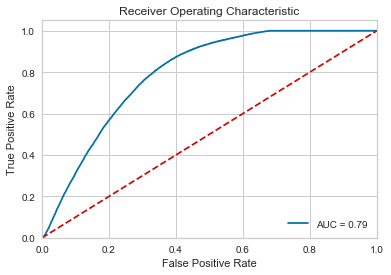

In [28]:
from sklearn import metrics

my_y_pred = predict_cls(model.predict(X_test), 0.5)
y_pred = model.predict(X_test)
conf_mat = confusion_matrix(y_test, my_y_pred)
print(conf_mat)

# tp = conf_mat[0][0]
# tn = conf_mat[1][1]
# fp = conf_mat[0][1]
# fn = conf_mat[1][0]

# TPR = tp / (tp + fn)
# FPR = fp / (fp + fn)

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
